In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from supriya import SynthDefBuilder
from supriya.ugens import Out, SinOsc

with SynthDefBuilder(out=0, gain=0.0, frequency=440) as builder:
    source = SinOsc.ar(frequency=builder["frequency"])
    source *= builder["gain"].db_to_amplitude()
    Out.ar(bus=builder["out"], source=source)

synthdef = builder.build(name="test:sine")

In [3]:
from supriya import Server, SynthDefBuilder

server = Server().boot()
with server.at():
    with server.add_synthdefs(synthdef):
        synth = server.add_synth(synthdef=synthdef)

server.sync()

<Server ONLINE [/Applications/SuperCollider.app/Contents/Resources/scsynth -R 0 -l 1 -u 57110]>

In [4]:
lin_scope = server.add_frequency_scope(bus=server.audio_output_bus_group)
log_scope = server.add_frequency_scope(
    bus=server.audio_output_bus_group, frequency_mode="logarithmic"
)
sr = server.status.target_sample_rate

In [5]:
print(server.query_tree())

NODE TREE 0 group
    1 group
        1000 test:sine
            frequency: 440.0, gain: 0.0, out: 0.0
    1001 supriya:freq-scope-lin-shm:1
        fft_buffer_size: 4096.0, rate: 4.0, scope_id: 0.0, in_: 0.0
    1002 supriya:freq-scope-log-shm:1
        fft_buffer_size: 4096.0, rate: 4.0, scope_id: 1.0, in_: 0.0


In [6]:
synth.set(frequency=3215)

In [7]:
synth.set(gain=0)

-15.926549911499023 -197.42428588867188


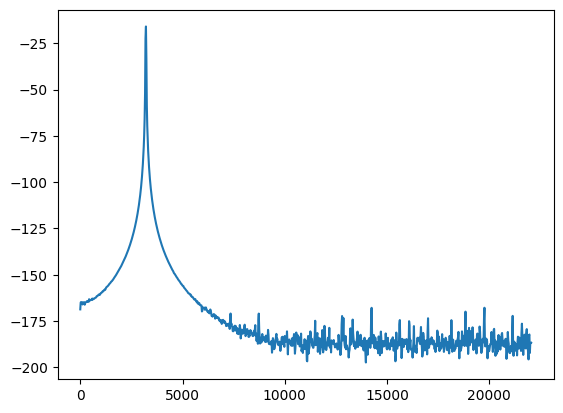

In [8]:
lin_available_frames, lin_data = lin_scope.read()
lin_axis = np.linspace(start=0, stop=sr / 2, num=lin_available_frames)
plot = plt.plot(lin_axis, lin_data[:lin_available_frames])
print(max(lin_data[:lin_available_frames]), min(lin_data[:lin_available_frames]))

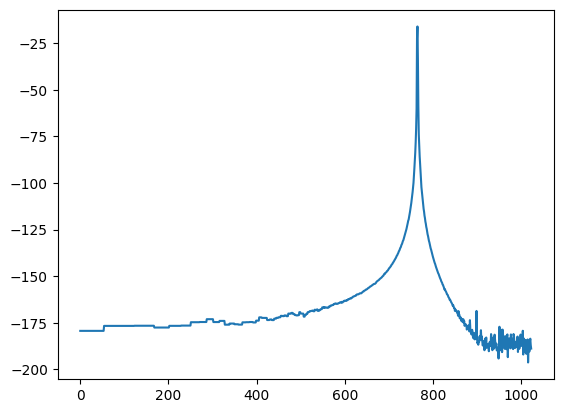

In [9]:
log_available_frames, log_data = log_scope.read()
log_plot = plt.plot(log_data[:log_available_frames])
# I'm not sure how to setup logarithmic x-axis labels that make sense